In [29]:
import sys
from pathlib import Path

p = Path('.').resolve()
sys.path.append(str(p.parent))
sys.path

['/home/user/miniconda/envs/py36/lib/python36.zip',
 '/home/user/miniconda/envs/py36/lib/python3.6',
 '/home/user/miniconda/envs/py36/lib/python3.6/lib-dynload',
 '',
 '/home/user/miniconda/envs/py36/lib/python3.6/site-packages',
 '/home/user/miniconda/envs/py36/lib/python3.6/site-packages/IPython/extensions',
 '/home/user/.ipython',
 '/app/biggraph',
 '/app/biggraph',
 '/app/biggraph']

In [30]:
from utils.data_utils import *
from utils.faiss_utils import *

In [54]:
import matplotlib.pyplot as plt
import linecache


def plot_pca(data, ind=None, size=(20, 20), n=int(10e4)):
    if ind is None:
        ind = np.zeros(len(data))
    else:
        ind = ind.flatten()
    plt.figure(figsize=size)
    plt.scatter(data[:n, 0], data[:n, 1], c=I[:n].flatten(), s=0.1)
    

def find_neighbours(basename, idx, ent_list):
    
    urls_file = Path('/data/graphs/') / basename / (basename + '.urls')
    f = urls_file.as_posix()
    for pos, cluster in enumerate(idx):
        print("Cluster {}".format(pos))
        for node in cluster:
            line = ent_list[node]
            print(linecache.getline(f, line + 1))
            

def load_XY(basename):
    model_path = Path("/data/models") / basename
    print("Loading data..")
    X, Y = load_data(model_path)
    classes = len(np.unique(Y))
    print("X shape: {}".format(X.shape))
    return X, Y


def centroid_neigh(basename, k_means, X, n=15):
    d = X.shape[1]
    index = faiss.IndexFlatL2(d)
    index.add(X)
    D, I = index.search(k_means.centroids, n)
    entities = get_entities_list(basename)
    find_neighbours(basename, I, entities)

    
def plot_true_labels(X_pca, Y, labels, n=int(10e4), _3d=False):
    
    ind = np.random.randint(len(X_pca), size=n)
    x = X_pca[ind, 0]
    y = X_pca[ind, 1]
    lab_subset = Y[ind].astype("int")
    # vals = np.unique(lab)
    cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
    cdict = {value: cols[pos] for (pos, value) in enumerate(labels.keys())}
    fig, ax = plt.subplots(figsize=(20, 20))
    for key in labels:
        ix = np.where(lab_subset==int(key))
        label = labels[key]
        ax.scatter(x[ix], y[ix], c=cdict[key], label=label, s=0.1)
    
    ax.legend()
    plt.show()

# CNR-2000

In [32]:
basename = "cnr-2000"
X, Y = load_XY(basename)
cnr = kmeans(X, 6)

Loading data..
Labels not defined
X shape: (325557, 64)


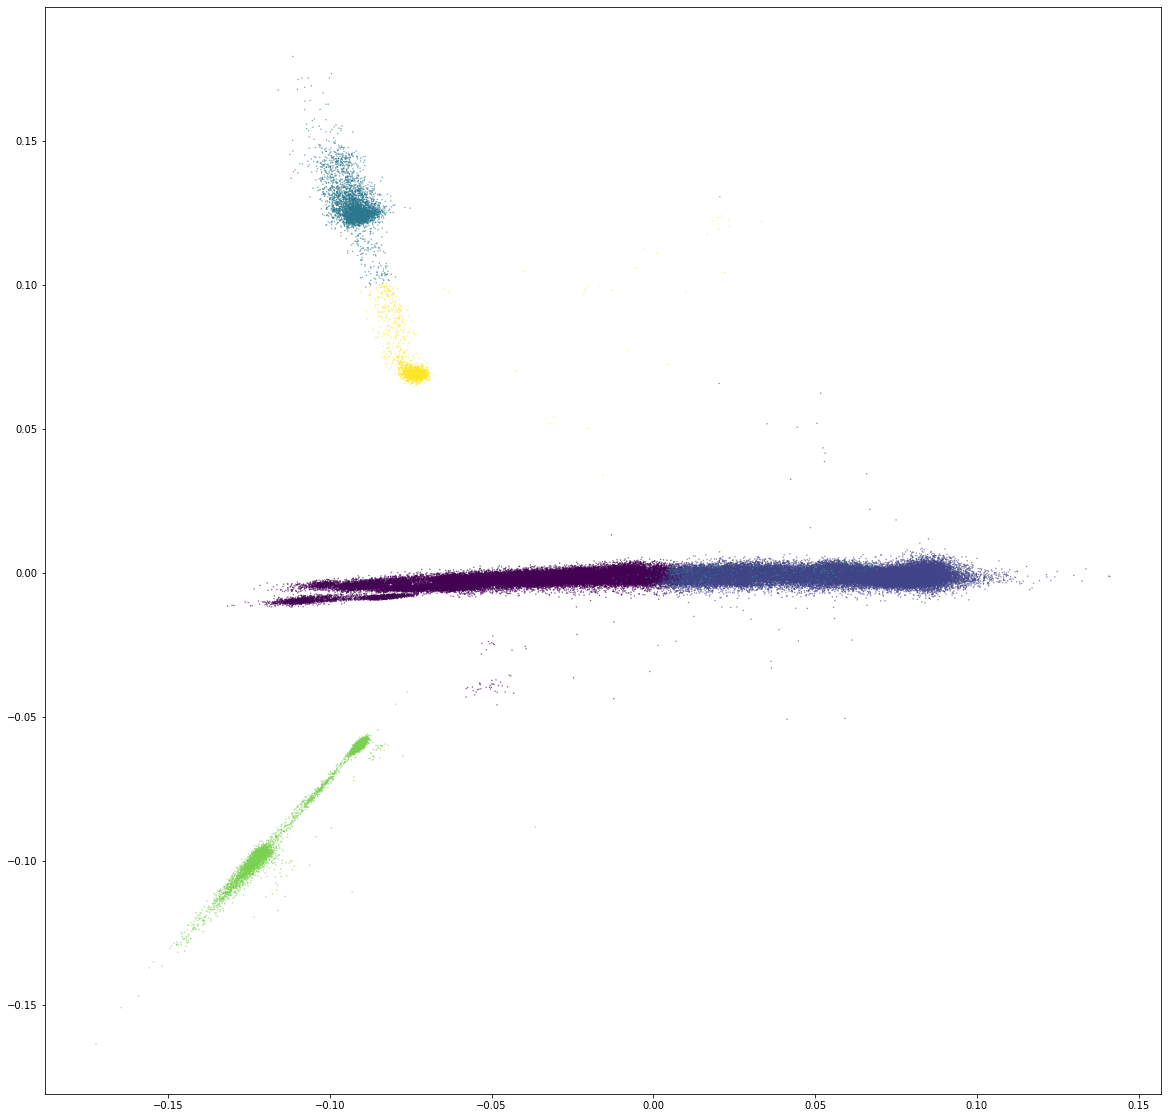

In [33]:
cnr_pca = PCA(X)
D, I = cnr.index.search(X, 1)
plot_pca(cnr_pca, I)

In [34]:
centroid_neigh(basename, cnr, X)

Cluster 0
http://www.istc.cnr.it/cessba/modules.php?op=modload&name=Members_List&file=index&letter=All&sortby=uname&authid=82b8800d44c714ac8ff4a678fb1ce8af

http://m1.ira.cnr.it/pipermail/ira-users/2003/001322.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2002/000021.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001614.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001535.html

http://sti.iriti.cnr.it/~de_paoli/feno11.htm

http://m1.ira.cnr.it/pipermail/ira-users/2003/001827.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001120.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001755.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001945.html

http://m1.ira.cnr.it/pipermail/ira-users/2003/000932.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001530.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001662.html

http://m1.ira.cnr.it/pipermail/ira-users/2003/001787.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001216.html

Cluster 1
ht

# Indochina-2004

Loading data..
X shape: (7414768, 64)


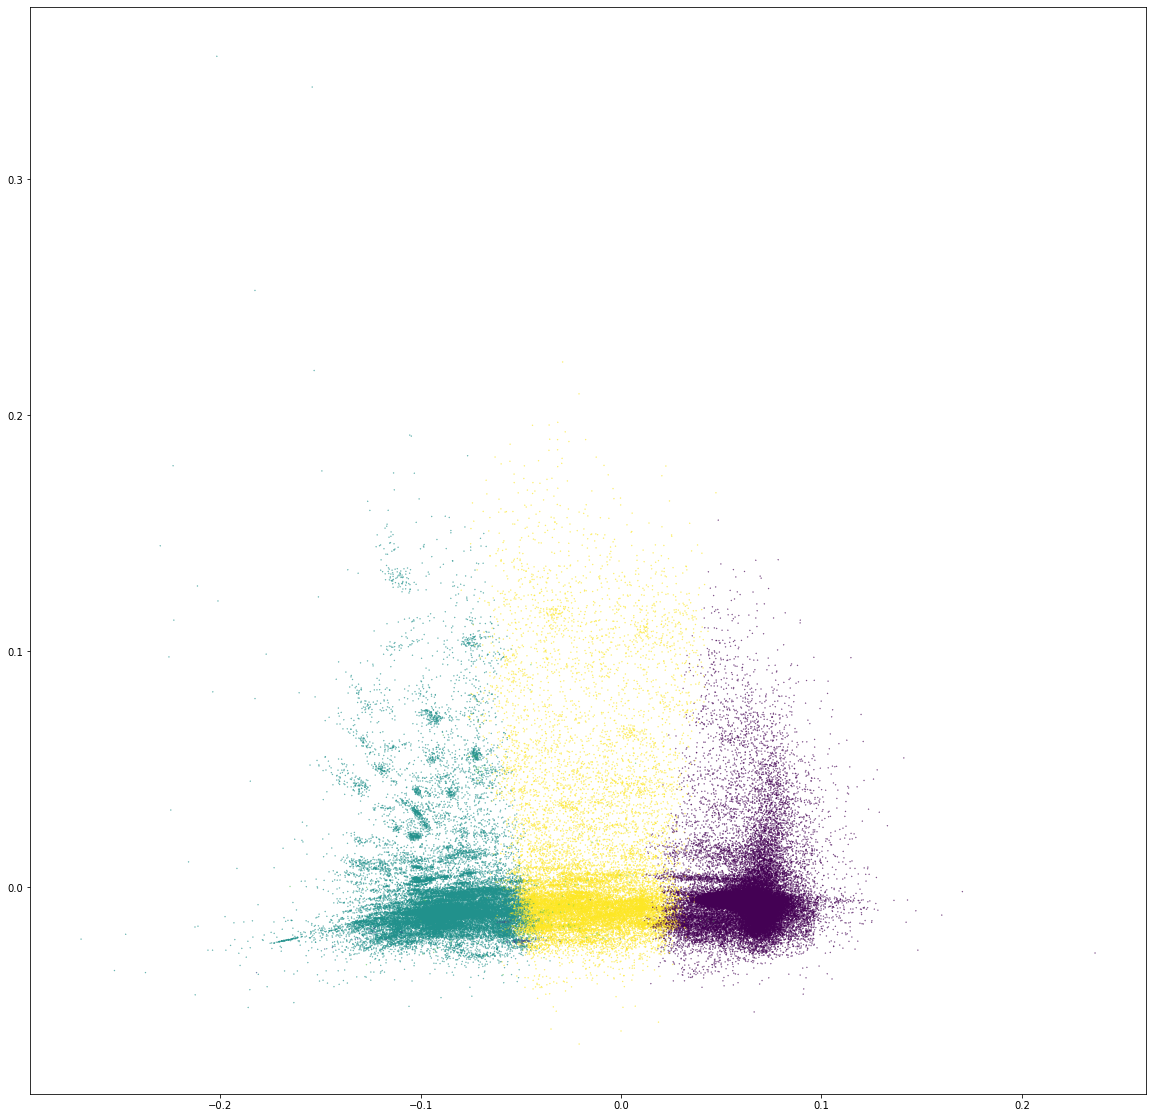

In [50]:
basename = "indochina-2004"
X, Y = load_XY(basename)
indochina = kmeans(X, 5)
indo_pca = PCA(X)
D, I = indochina.index.search(X, 1)
plot_pca(indo_pca, I)

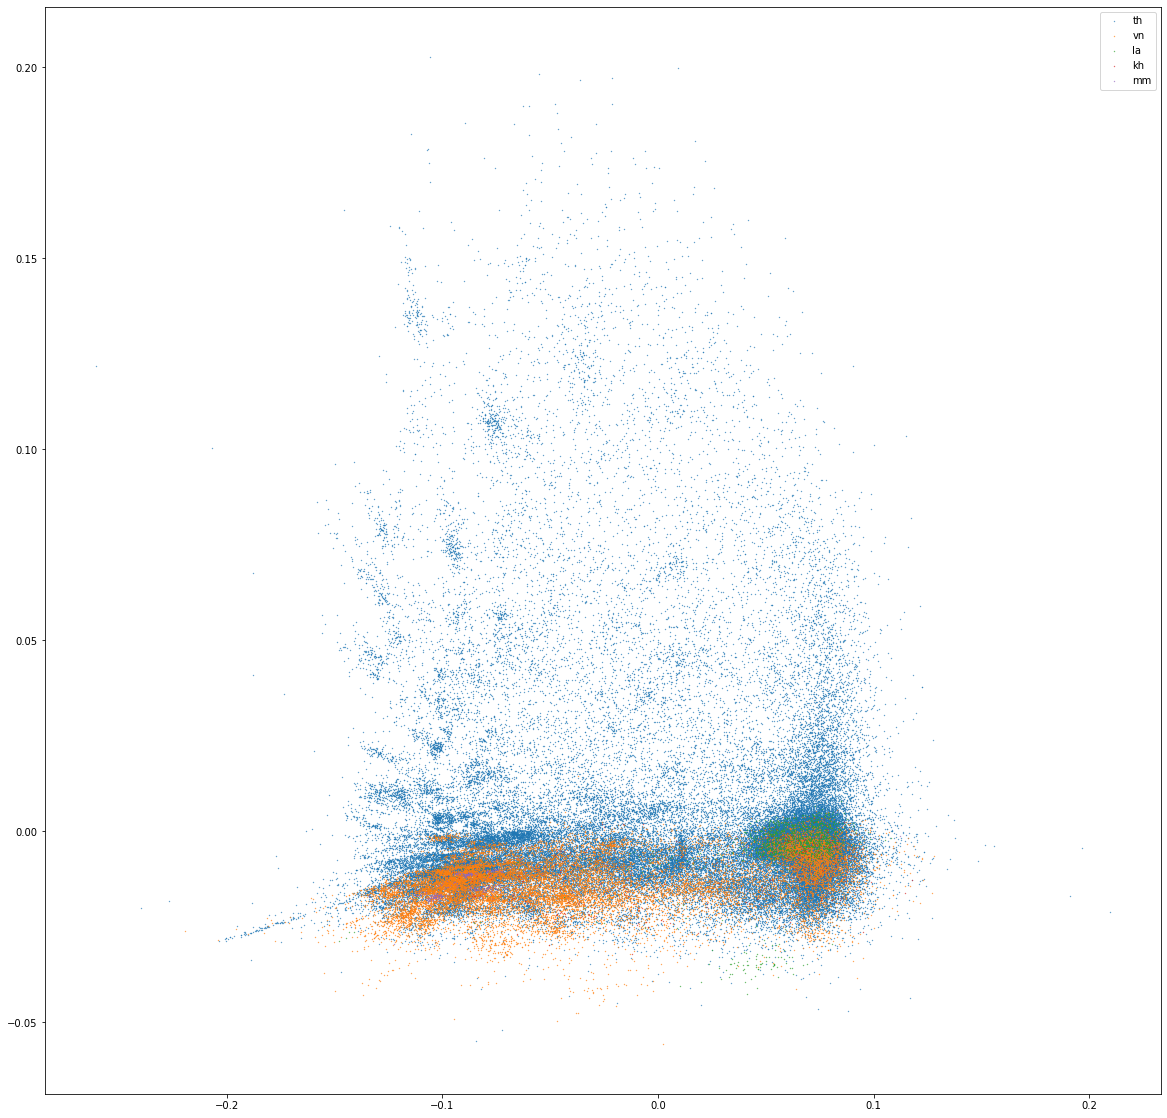

In [55]:
labels_dict = Path("/data/models") / basename / "labels.json"
with labels_dict.open() as f:
    lll = json.load(f)

plot_true_labels(indo_pca, Y, lll['labels'])

In [19]:
centroid_neigh(basename, indochina, X)

Cluster 0
http://www.yupparaj.ac.th/DigitalLibrary/snet6/envi3/who/who.htm

http://www.uni.net.th/~02_2543/CH6/Menu_Frame_6.htm

http://intra.chiangmai.ac.th/~pr_cmu/news2547/daily-news_010.html

http://www.la.ubu.ac.th/thai/Web_Stu/Data/Meditation_Tour/two.html

http://province.moph.go.th/songkhla/uc/MasterCup/Hosp.asp?Amphur=900300&Tambol=900312&CATM=90031207

http://www.science.cmu.ac.th/observatory/Research/abstract/EU%20Hya.html

http://nongkhai.ect.go.th/thai/mp/18aug44/sumright.html

http://www.uni.net.th/~02_2543/CH11/Menu_CH11_1.htm

http://www.danangpt.vnn.vn/danang/vanhoa/vchngthuat/index.htm

http://www.hcm.edu.vn/cityweb/GV_Mon.idc?vfile=05HB01GVC3&mon=SI

http://lecture.compsci.buu.ac.th/~tomkanok/310416/

http://dns.vista.gov.vn/TestEnglish/anpham/vdn/1999/so3/envi/main.htm

http://www.vista.gov.vn/VistaEnglish/VistaWeb/anphamdientu/main.htm

http://ssnet.doae.go.th/ssnet2/MIS/ror_44/rpt_3_15.htm

http://cai.md.chula.ac.th/lesson/anatomy/picture/quiz/q11.htm

Cluster 1
h

In [12]:
indo_ent = get_entities_list(basename)

In [11]:
import linecache

urls_file = Path('/data/graphs/') / basename / (basename + '.urls')
f = urls_file.as_posix()
for pos, value in enumerate(entities_list):
    print(I[pos], linecache.getline(f, value + 1))
    if pos >= 20:
        break

[0] http://www.hcm.edu.vn/cityweb/GV_Mon.idc?vfile=13EA01GV&mon=GD

[2] http://www.mofa.gov.vn:8080/tbqt/15,04/ttqg%20hoso15,04.htm

[2] http://www.buysell.in.th/buysell/cgi-bin/buysell.cgi?ct=jobother&md=second&id=1858&min=&max=

[2] http://ipc10.dip.go.th/CalendarActivity/?tdate=13%2F5%2F2548

[2] http://intraserver.nurse.cmu.ac.th/mis/course/course_detail.asp?CourseNo=559712&Offset=lecture

[0] http://www.jinan.co.th/?sid=935820695&m=2&productid=13PC   Baby K6-333 Mhz.

[2] http://www.pcworld.com.vn/pcworld/niengiam/?tgt=Detail.asp&UnitID=CT0170&_return=L3Bjd29ybGQvbmllbmdpYW0vRGVmYXVsdC5hc3A~dGd0PVNlYXJjaC5hc3AmQ2xhc3NpZmllZD0xJmlsPUgg

[4] http://www.gdt.gov.vn/index.jsp?sid=7&scr=800&progid=25025&Sohieu=1040000006&Dieukien=HDON&ten=H%C3%B3a %C4%91%C6%A1n ch%E1%BB%A9ng t%E1%BB%AB&Type=1

[2] http://www.bagan.net.mm/news/new_detail.asp?news_no=2155

[0] http://www.krirk.ac.th/webboards/AdminControl/AEdit.asp?qNo=98Cat5&QCat=5&AnswerID=14

[0] http://www.thaitravel.co.th/?page=SdbsH

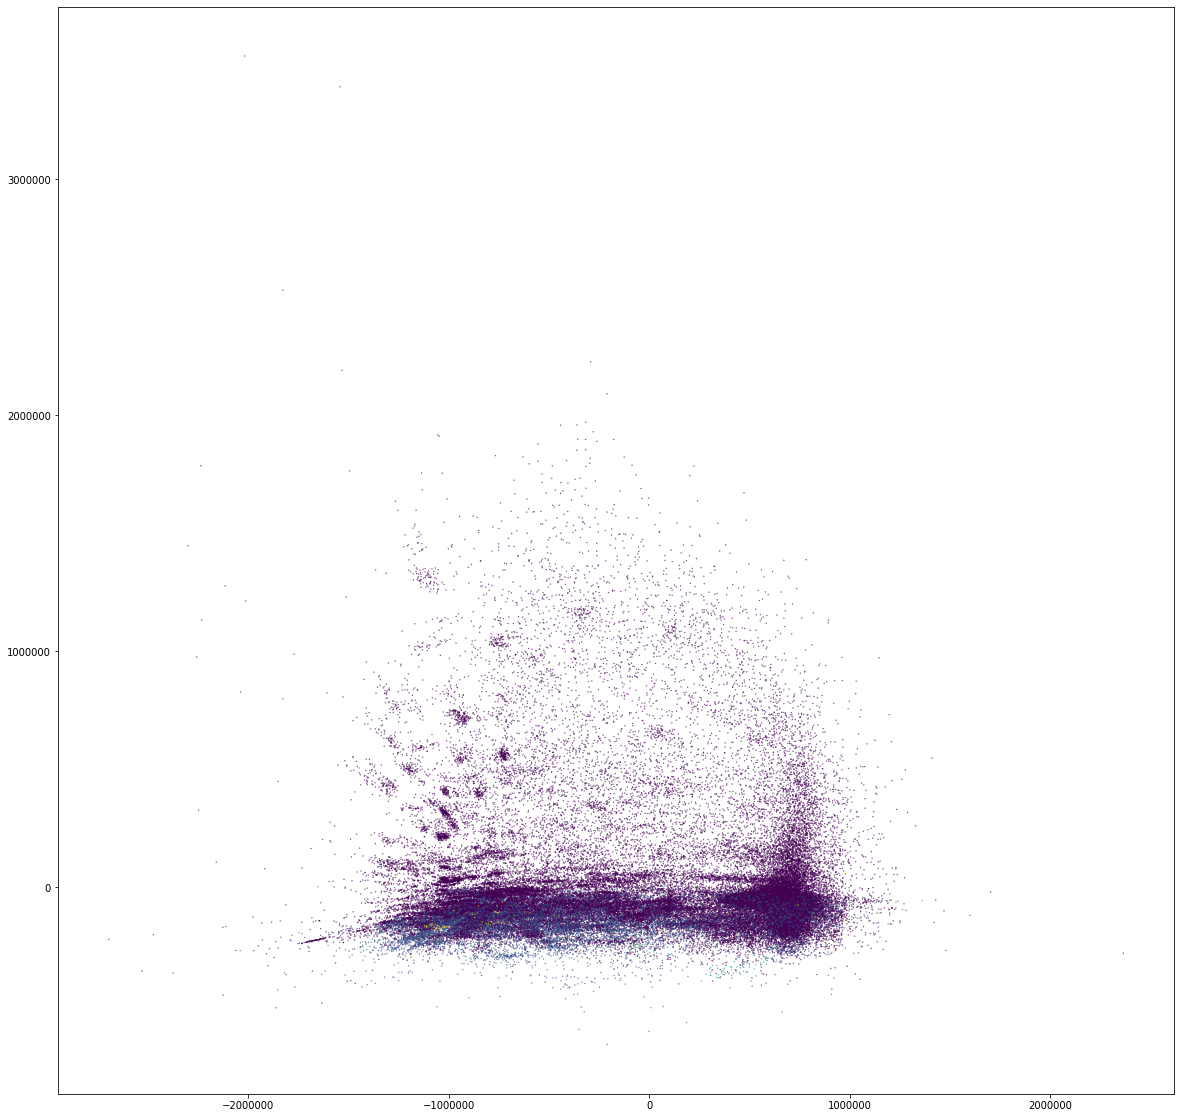

In [35]:
plt.figure(figsize=(20,20))
n = int(10e4)
plt.scatter(tr[:n, 0]*10**7, tr[:n, 1]*10**7, c=Y[:n].astype("int"), s=0.1)

In [46]:
n = int(10e4)
ind = np.random.randint(len(X), size=n)

x = tr[ind, 0]
y = tr[ind, 1]
lab = Y[ind].astype("int")

val = np.unique(lab)
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
cdict = {value: cols[pos] for (pos, value) in enumerate(val)}

fig, ax = plt.subplots(figsize=(20, 20))
for g in val:
    ix = np.where(lab==g)
    label = lll['labels'][str(g)]
    ax.scatter(x[ix], y[ix], c=cdict[g], label=g, s=0.1)

ax.legend()
plt.show()

NameError: name 'tr' is not defined

In [68]:
mat = faiss.PCAMatrix (64, 3)
mat.train(X)
assert mat.is_trained
tr = mat.apply_py(X)
tr.shape

(7414768, 3)

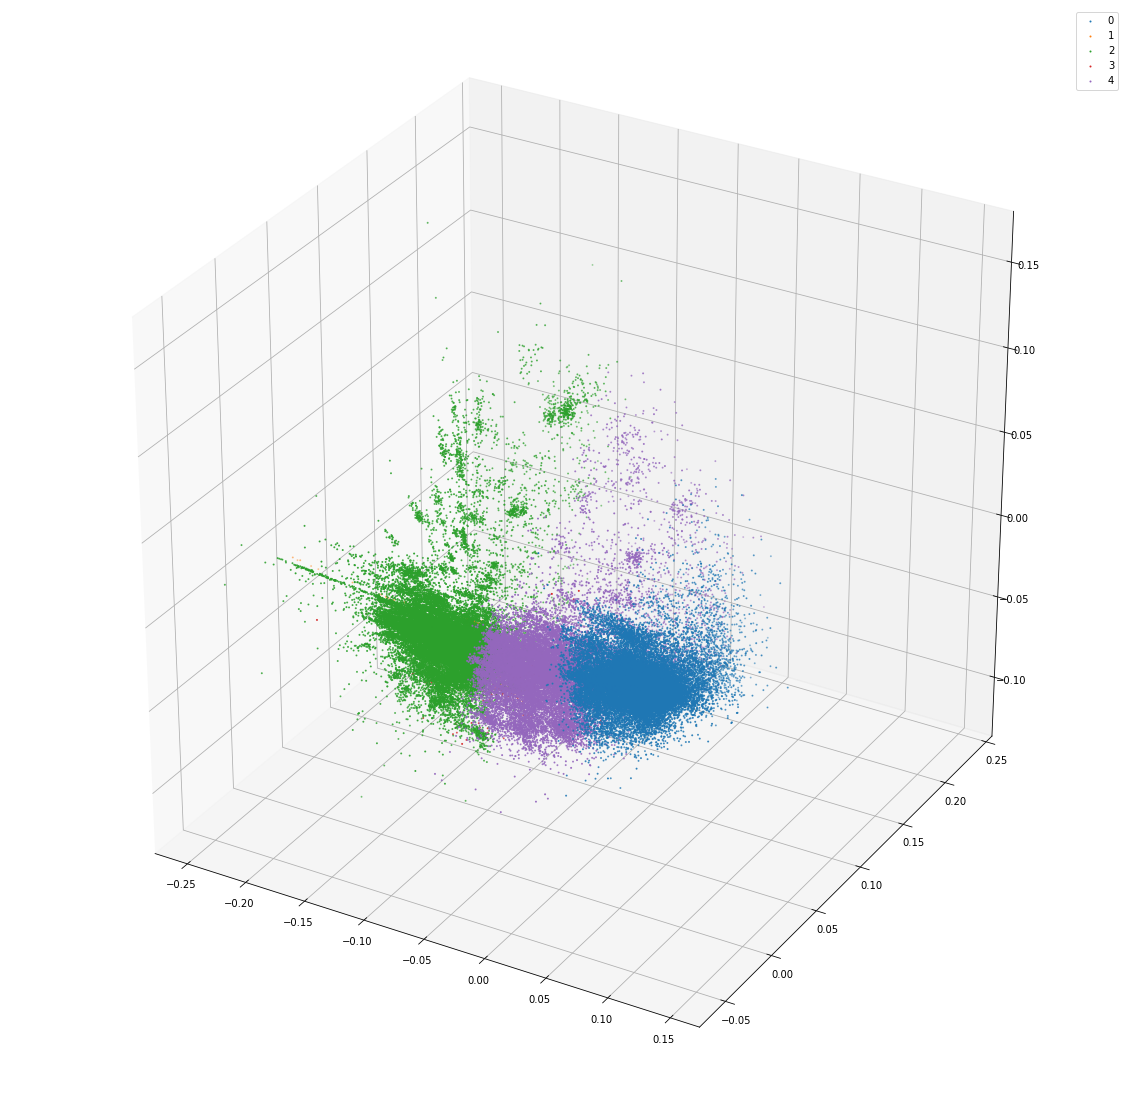

In [81]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


n = 100000
ind = np.random.randint(len(tr), size=n)
xs = tr[ind, 0]
ys = tr[ind, 1]
zs = tr[ind, 2]
# ax.scatter(xs, ys, zs, s=1)

lab = I[ind].flatten().astype("int")
val = np.unique(lab)
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
cdict = {value: cols[pos] for (pos, value) in enumerate(val)}

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
for g in val:
    ix = np.where(lab==g)
    ax.scatter(xs[ix], ys[ix], zs[ix], c=cdict[g], label=g, s=1)

ax.legend()
plt.show()

In [124]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


n = 100000
ind = np.random.randint(len(tr), size=n)
xs = tr[ind, 0]
ys = tr[ind, 1]
zs = tr[ind, 2]
# ax.scatter(xs, ys, zs, s=1)

lab = Y[ind].flatten().astype("int")
val = np.unique(lab)
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
cdict = {value: cols[pos] for (pos, value) in enumerate(val)}

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
for g in val:
    ix = np.where(lab==g)
    ax.scatter(xs[ix], ys[ix], zs[ix], c=cdict[g], label=g, s=1)

ax.legend()
plt.show()

IndexError: index 3267148 is out of bounds for axis 0 with size 325557